# Super Store Analysis

## Data Information

The data set contains sales information about a super store. It consist of 13 columns with almost 10000 entries representing each sale made. Each row represents an order of an item and the corresponding quantity, sales, discount and profit. There is also the mode of shipment, customer segment and geographical aspects.  

### Question for Analysis
+ Which Category is Best Selling and Most Profitable?
+ What are the Best Selling and Most Profitable Sub-Category?
+ Which is the Top Selling Sub-Category?
+ Which Customer Segment is Most Profitable?
+ Which is the Preferred Ship Mode?
+ Which Region is the Most Profitable?
+ Which City has the Highest Number of Sales

### Load the necessary libraries

In [1]:
# load the necassary libraries
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix

# Import necessary libraries for graph viz

from IPython.display import Image  
from sklearn.tree import export_graphviz
#import pydotplus

%matplotlib inline


In [2]:
# read the file
super_store_init = pd.read_csv('SampleSuperStore.csv')
# print the first few rows
super_store_init.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


## Data Cleaning

In [3]:
# create a copy of the file
super_store_1 = super_store_init.copy()

In [4]:
# check the data info
super_store_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [5]:
# check the summary statistics
super_store_1.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


### Handling Missing Values
No null value is present in the data

In [6]:
# check for null values
super_store_1.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

### Checking for duplicates

There are seventeen duplicate rows and they need to be dropped

In [7]:
# check for duplicates
super_store_1.duplicated().sum()

17

In [8]:
# drop the duplicates
super_store_1.drop_duplicates(inplace = True)

# check the shape 
super_store_1.shape

(9977, 13)

### Create a new column called Profit Margin
Now, we will create a calculated field for Profit Margin. The formula is (Profit / Sales) * 100.

In [9]:
# create a new colummn 'profit margin'
super_store_1['Profit_margin'] = (super_store_1.Profit/super_store_1.Sales)*100
super_store_1.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit,Profit_margin
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136,16.00
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820,30.00
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714,47.00
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310,-40.00
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164,11.25


### Remove unnecessary columns 
remove the country column (since only one counry is being considered here) and the postal code column 

In [11]:
# remove unnecessary column 
super_store_1.drop(['Country', 'Postal Code'], axis=1, inplace = True)
super_store_1.shape

(9977, 12)

### Correlation between numerical values
No Strong correlation between any of the numerical variables but there seems to be a high negative correlation between the profit margin and the discount.

<Axes: >

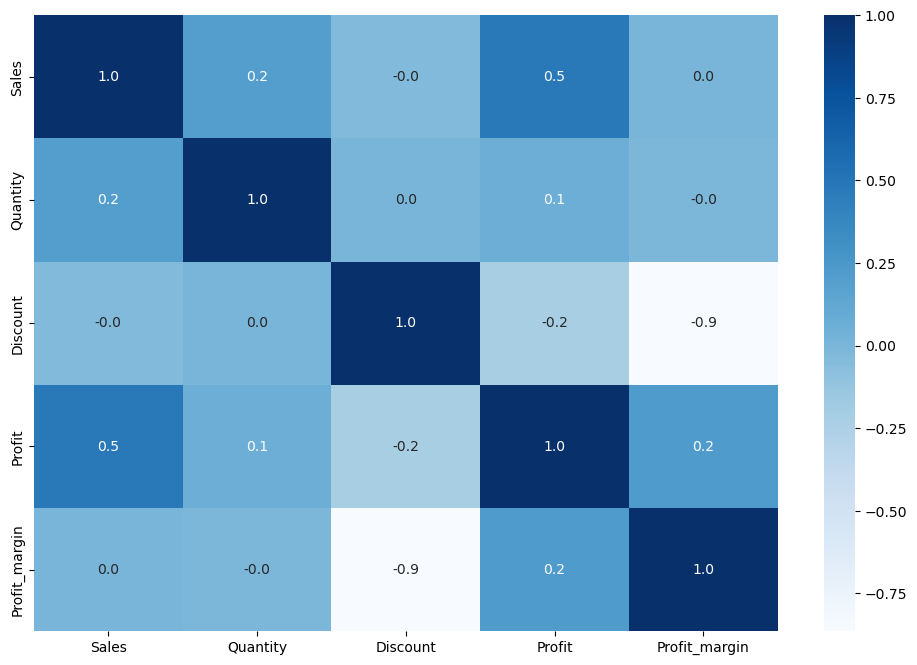

In [12]:
#Checking the corelations between numeric columns
corr_num=super_store_1.select_dtypes(include=[np.number]) #getting the numeracal features
f,ax = plt.subplots(figsize=(12, 8))
#plotting a heatmap
sns.heatmap(corr_num.corr(method='pearson'), annot=True, fmt= '.1f',ax=ax, cmap="Blues") 

### Outlier Detection and removal accordingly

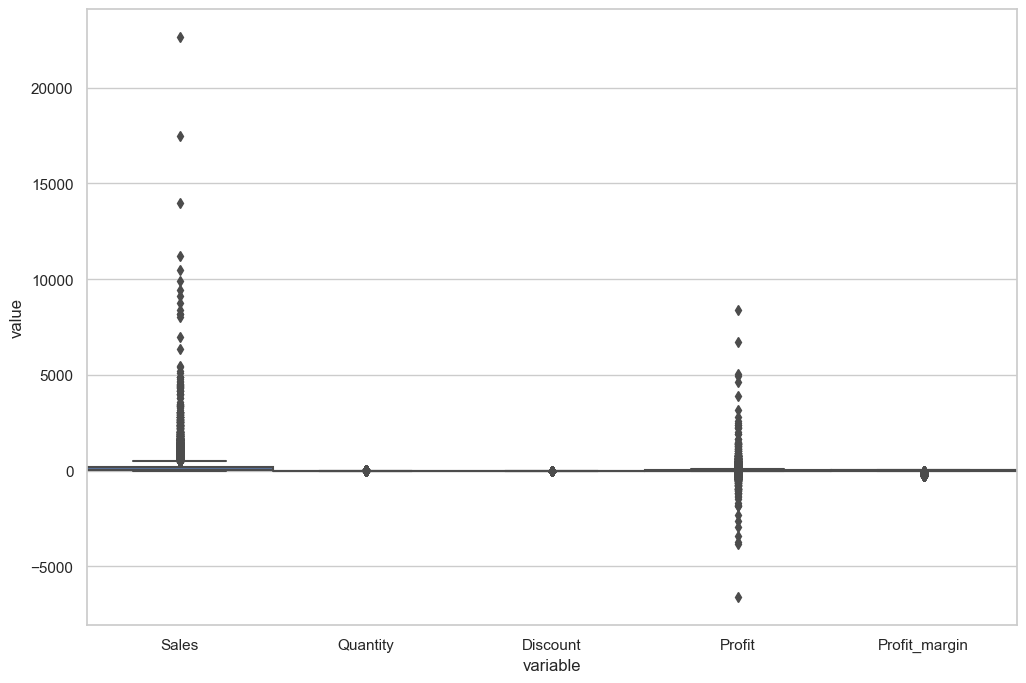

In [13]:
#BoxPlot to see the outliers clearly
plt.figure(figsize=[12,8])
sns.set(style="whitegrid")
sns.boxplot(x="variable", y="value", data=pd.melt(corr_num), width=1)

plt.show()

In [14]:
# create a function to remove outlier
def remove_outlier(dataset,k=3.33):
    for col in dataset.columns:
            if (dataset[col].dtype=="int64" or dataset[col].dtype=="float64"):
                mean = dataset[col].mean()
                global ds      
                std = dataset[col].std()    
                outlier = [i for i in dataset[col] if (i > mean - k * std)]
                outlier = [i for i in outlier if (i < mean + k * std)]       
                ds = dataset.loc[dataset[col].isin(outlier)]

In [15]:
# remove outlier
remove_outlier(super_store_1,k=3.33)

In [16]:
super_store_1.shape

(9977, 12)

<Axes: xlabel='variable', ylabel='value'>

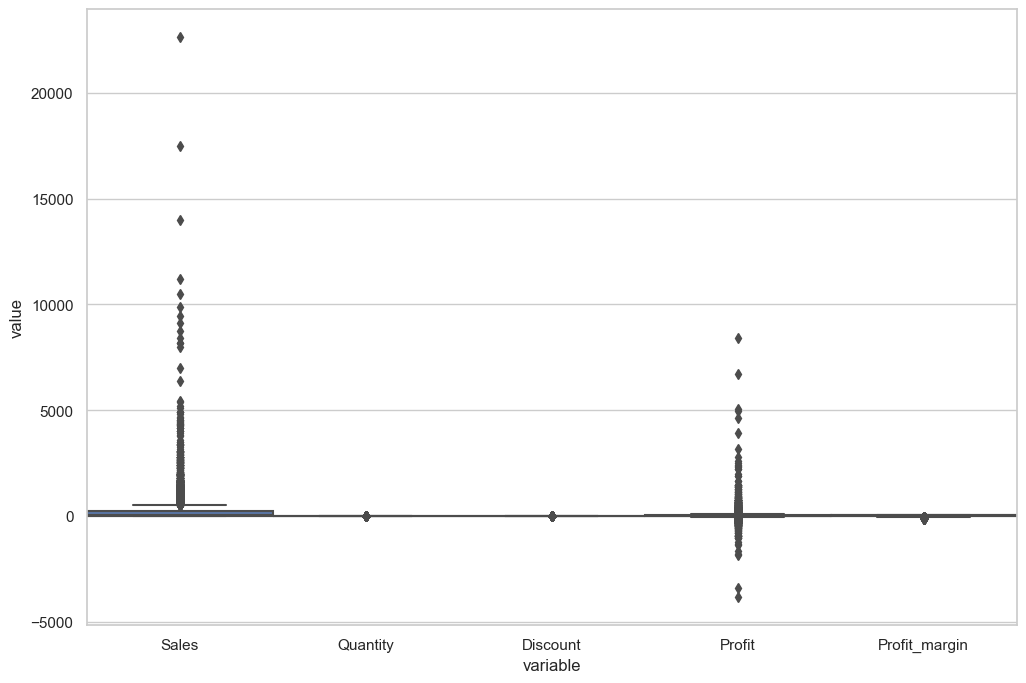

In [17]:
#Let's see the outliers are removed or not
ds_con=ds.select_dtypes(include=[np.number])
plt.figure(figsize=[12,8])
sns.set(style="whitegrid")
sns.boxplot(x="variable", y="value", data=pd.melt(ds_con), width=1)

## Exploratory Data Analysis



In [18]:
super_store_1 = ds.copy()

In [19]:
#What are the numbers of unique entries in the Categorical columns
for col in super_store_1.columns:
    if super_store_1[col].dtype=='object':
        print("Number of unique entries in",col + " are",ds[col].nunique())
        print("=================================================")

Number of unique entries in Ship Mode are 4
Number of unique entries in Segment are 3
Number of unique entries in City are 527
Number of unique entries in State are 49
Number of unique entries in Region are 4
Number of unique entries in Category are 3
Number of unique entries in Sub-Category are 17


### Who is leading Sales among the four Regions

The south region is generating more sales compared to the other regions

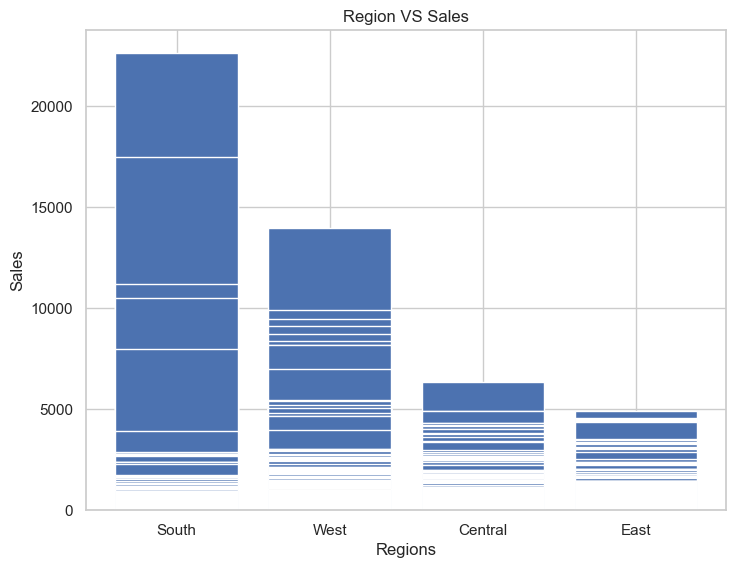

In [20]:
#Region wise sales plot
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
#ax.bar(ds['Region'],ds['Sales'])
ax.bar(ds['Region'],super_store_1['Sales'].sort_values(ascending = False))
plt.title("Region VS Sales")
plt.xlabel("Regions")
plt.ylabel("Sales")
plt.show()

### Which is the Preferred Ship Mode?
Standard is the most preferred ship mode 

<Figure size 1500x800 with 0 Axes>

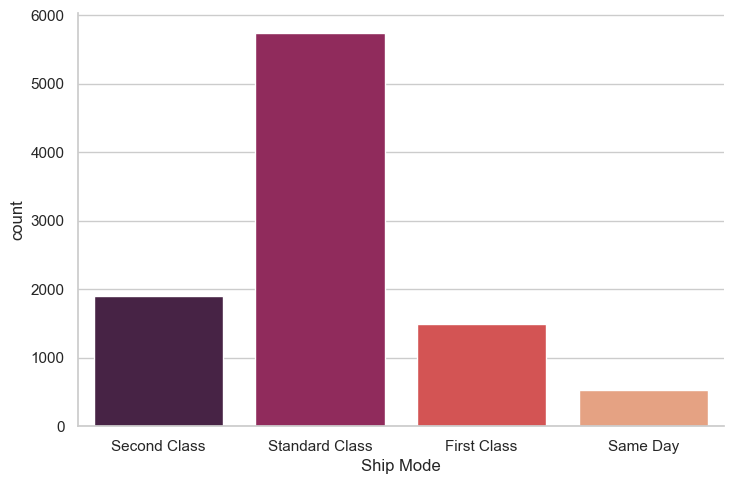

In [30]:
#Segment wise count of the ship modes
plt.figure(figsize=[15,8])
sns.catplot(x= 'Ship Mode', data=super_store_1, kind="count", 
            aspect=1.5, palette="rocket")

### Which Category is best selling and is most profitable

Our observations are:

+ All 3 categories — Furniture, Office Supplies and Technology make similar amount of sales.
+ Technology is Best Selling and it’s good to know that this category is the Most Profitable too. Only minimal quantity is sold as these products are usually one-off purchases that can last at least 4–5 years.
+ Although Furniture makes similar sales as Technology, it is the least profitable and quantity sold are at a minimum too.
+ Office Supplies sells the most in terms of quantity as it is relatively cheap product.

In [31]:
# Group sales, profit and quantity by category
best_selling = pd.DataFrame(super_store_1.groupby(['Category'])[['Sales', 'Profit', 'Quantity']].sum())
best_selling

,Sales,Profit,Quantity
Category,,,
Furniture,739689.8713,21190.4233,7962
Office Supplies,701775.0520,152897.4630,21676
Technology,829854.0540,154694.9173,6932


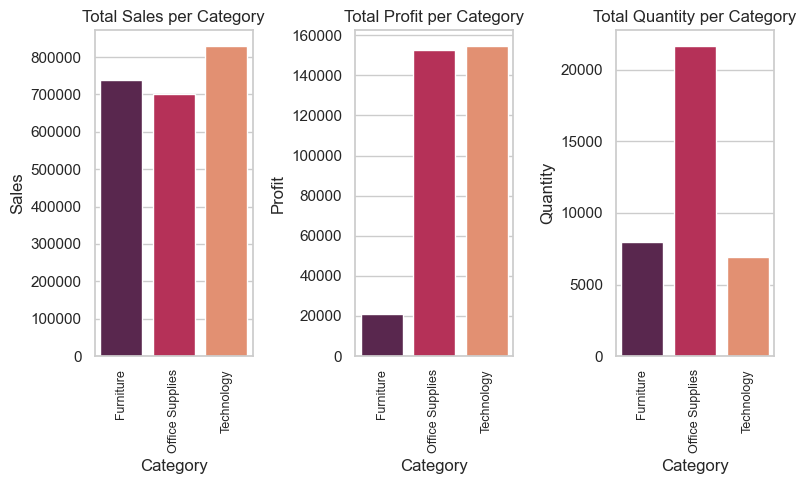

In [33]:
# Set for grouped plots - figure with a 2x2 grid of Axes
sns.set_theme(style="whitegrid")
figure, axis = plt.subplots(1, 3, figsize=(8, 5))
# Plot barplots
cat1 = sns.barplot(x = best_selling.index, y =best_selling.Sales, ax=axis[0], palette = 'rocket')
cat2 = sns.barplot(x = best_selling.index, y = best_selling.Profit, ax=axis[1], palette = 'rocket')
cat3 = sns.barplot(x = best_selling.index, y = best_selling.Quantity, ax=axis[2], palette = 'rocket')
# Set titles
cat1.set(title = 'Total Sales per Category')
cat2.set(title = 'Total Profit per Category')
cat3.set(title = 'Total Quantity per Category')
# Rotate axis for x-axis
plt.setp(cat1.get_xticklabels(), rotation = 'vertical', size = 9)
plt.setp(cat2.get_xticklabels(), rotation = 'vertical', size = 9)
plt.setp(cat3.get_xticklabels(), rotation = 'vertical', size = 9)
# Set spacing between subplots
figure.tight_layout()

### What are the Best Selling and Most Profitable Sub-Category?

Let’s analyse the bar plots:

+ Phones and Chairs are Top 2 best selling sub-category.
+ Copiers produces most profit, followed by Phones, Accessories, Papers and Binders. The marketing strategy has to focus on marketing these products.
+ On the other end of the spectrum, Machines, Fasteners, Supplies, Bookcases and Tables make close to zero margin to losses. + These are products that Super Store can consider dropping from the product catalogue or increase the sale price and profit margin or bargain for a lower price from the supplier.

In [34]:
# Group by sub-category
subcat_best_seling_and_most_profit = pd.DataFrame(super_store_1.groupby(['Sub-Category'])[['Sales', 'Profit']].sum())
# Sort by descending order according to sales
subcat_sales = pd.DataFrame(subcat_best_seling_and_most_profit.sort_values('Sales', ascending = False))

# Sort by descending order according to profit
subcat_profit = pd.DataFrame(subcat_best_seling_and_most_profit.sort_values('Profit', ascending = False))

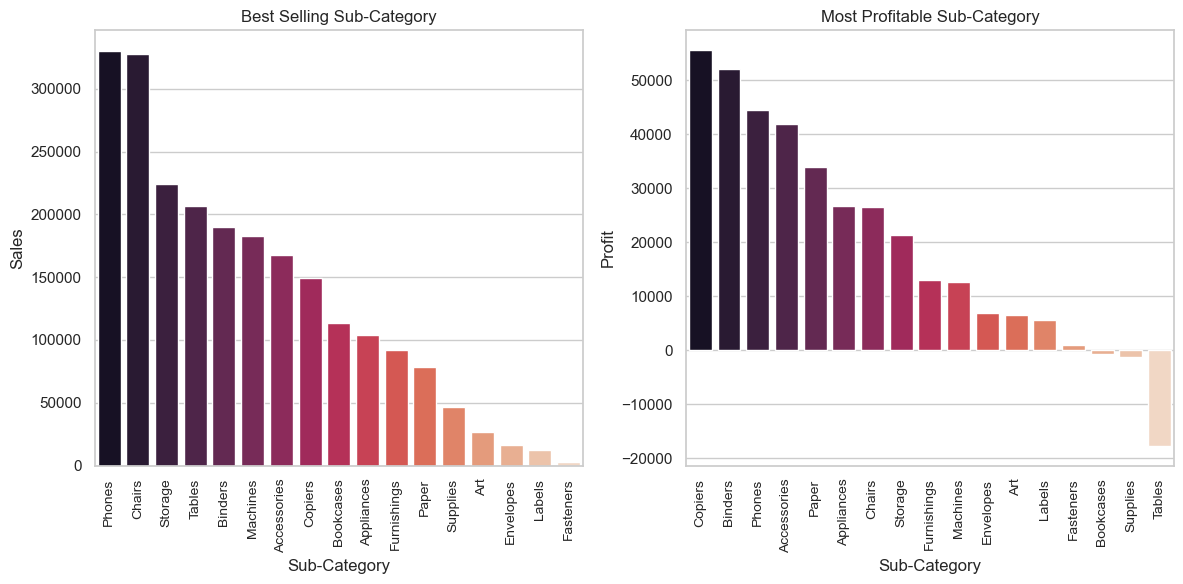

In [35]:
# Plot Bar Plots
sns.set_theme(style="whitegrid")
# Set for grouped plots - figure with a 1x2 grid of Axes
figure, axis = plt.subplots(1, 2, figsize=(12, 6))
# Plot Bar Plot for Best Selling Sub-Category
subcat1 = sns.barplot(data = subcat_sales, x = subcat_sales.index, y = subcat_sales.Sales,
                      palette = 'rocket', ax=axis[0])
subcat1.set(title="Best Selling Sub-Category")
subcat1.set_xticklabels(subcat1.get_xticklabels(),rotation = "vertical", size = 10)
# Plot Bar Plot for Most Profitable Sub-Category
subcat2 = sns.barplot(data = subcat_profit, x = subcat_profit.index, y = subcat_profit.Profit, 
                      palette = 'rocket', ax=axis[1])
subcat2.set(title = "Most Profitable Sub-Category")
subcat2.set_xticklabels(subcat2.get_xticklabels(),rotation = "vertical", size = 10)
# Set spacing between subplots
figure.tight_layout()
plt.show()

### Which is the Top Selling Sub-Category?

+ Super Store should ensure inventory are always well-stocked for the top selling sub-category such as Binders, Paper, Furnishings and Phones.
+ Despite being most profitable, Copiers sell the least only 234, but as it is a relatively expensive office equipment that is usually used for few years, it is understandable that it sells the least among all.

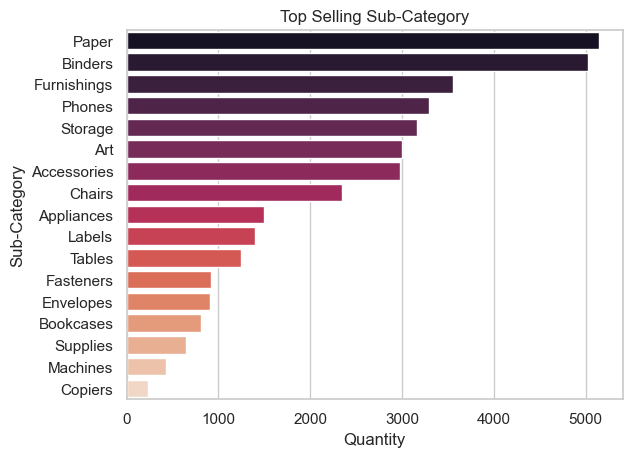

In [38]:
# create a dataframe grouping the super store by 
# sub-category and filering on quantity and sorting the 
# in descending order
subcat_top_quantity = pd.DataFrame(super_store_1.groupby(['Sub-Category'])[['Quantity']].sum().sort_values('Quantity',ascending=False))
# Plot Bar Plot for Top Selling Sub-Category
sns.set_theme(style="whitegrid")
sns.barplot(data = subcat_top_quantity, y = subcat_top_quantity.index, x = subcat_top_quantity.Quantity, palette = "rocket")
plt.title("Top Selling Sub-Category")
plt.show()

### which product category has the highest amount of sales for each region
 In each and every every region, sales for 'Office Supplies' are very poor. Furniture and Technology are well ahead.

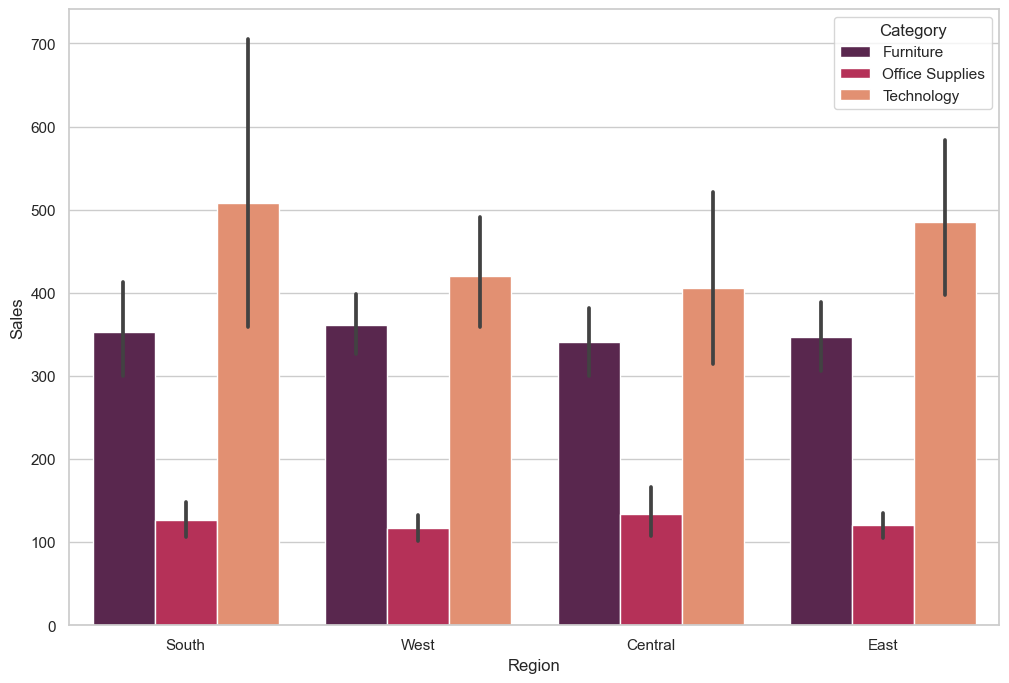

In [27]:
#Category wise sales in Each region
plt.figure(figsize=[12,8])
ax = sns.barplot(x="Region", y="Sales", hue="Category", data=super_store_1, palette="rocket")

### which product segment has the highest amount of sales for each region

The amount of sales for each customer segment per each region looks close but we can see that Home office had more sales in three regions compared to the other two segments and corporate leads in the central region.

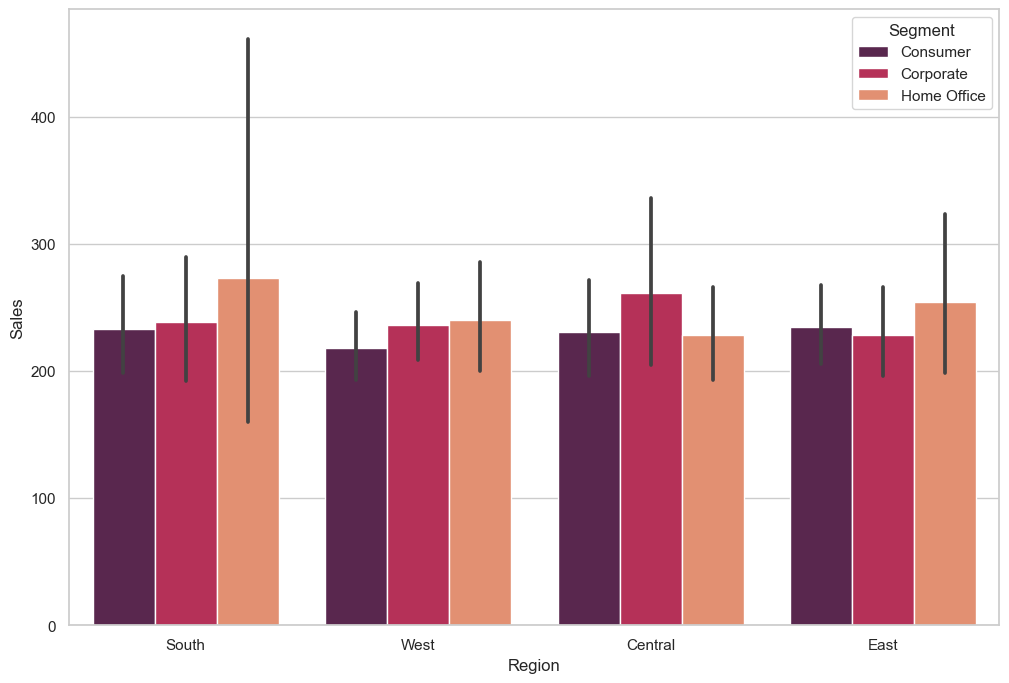

In [42]:
plt.figure(figsize=[12,8])
ax = sns.barplot(x="Region", y="Sales", hue="Segment", data=super_store_1, palette='rocket')

### Which Customer Segment is Most Profitable?

Consumer segment is most profitable, followed by Corporate Segment and Home Office. Hence, marketing strategy has to target or place more focus on retaining Consumer and Corporate Segment customers.


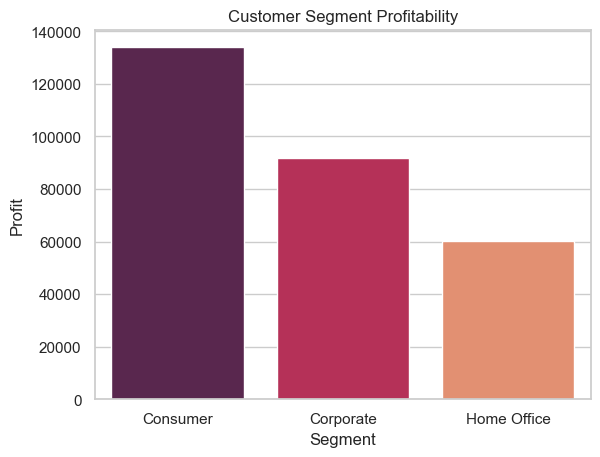

In [34]:
# group customer segment by Profit 
customer_segment_top_profit = pd.DataFrame(super_store_1.groupby(['Segment'])[['Profit']].sum())

# Plot Bar Plot
sns.set_theme(style="whitegrid")
sns.barplot(data = customer_segment_top_profit, x = customer_segment_top_profit.index, 
            y = customer_segment_top_profit.Profit, palette = "rocket")
plt.title("Customer Segment Profitability")
plt.show()

### Which Region is the Most Profitable?

Looking at the total profit for each region, one could say the western and eatern regions are generating more profit as they account for 70% of the total profit accrued to the store.

In [39]:
# segment the region based on profit
region_segment = pd.DataFrame(super_store_1.groupby(['Region'])['Profit'].sum().reset_index())
region_segment.sort_values('Profit', ascending = False)

,Region,Profit
3,West,108329.8079
1,East,91506.3092
2,South,46749.4303
0,Central,39655.8752


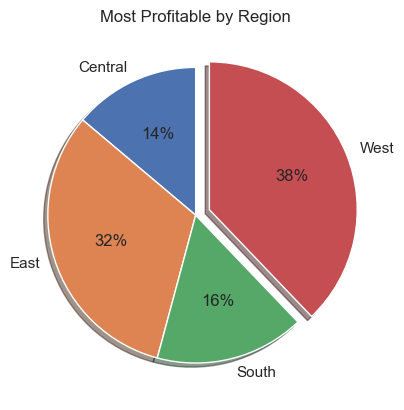

In [40]:
# Plot Pie Chart
explode = [0, 0, 0, 0.1]
plt.pie(region_segment.Profit, labels = region_segment.Region, startangle = 90, autopct = "%1.0f%%", explode = explode, shadow = True)
plt.title("Most Profitable by Region")
plt.show()

### Which City has the Highest Number of Sales?

In [42]:
# group the sales and quantity based on city 
# and picked the top 10 cities with most sales
city_sales = pd.DataFrame(super_store_1.groupby(['City'])[['Sales', 'Quantity']].sum().sort_values('Sales',
                                                                                                   ascending = False))
top10_city = city_sales[:10]
top10_city

,Sales,Quantity
City,,
New York City,256319.0410,3413
Los Angeles,175831.9010,2876
Seattle,119460.2820,1578
San Francisco,112577.1720,1920
Philadelphia,109061.4610,1978
Houston,64441.2564,1460
Chicago,48535.9770,1129
San Diego,47521.0290,670
Jacksonville,44713.1830,429


In [54]:
# filter the dataframe for the bottom 10 
# based 0n sales
bottom10_city = city_sales[-10:]


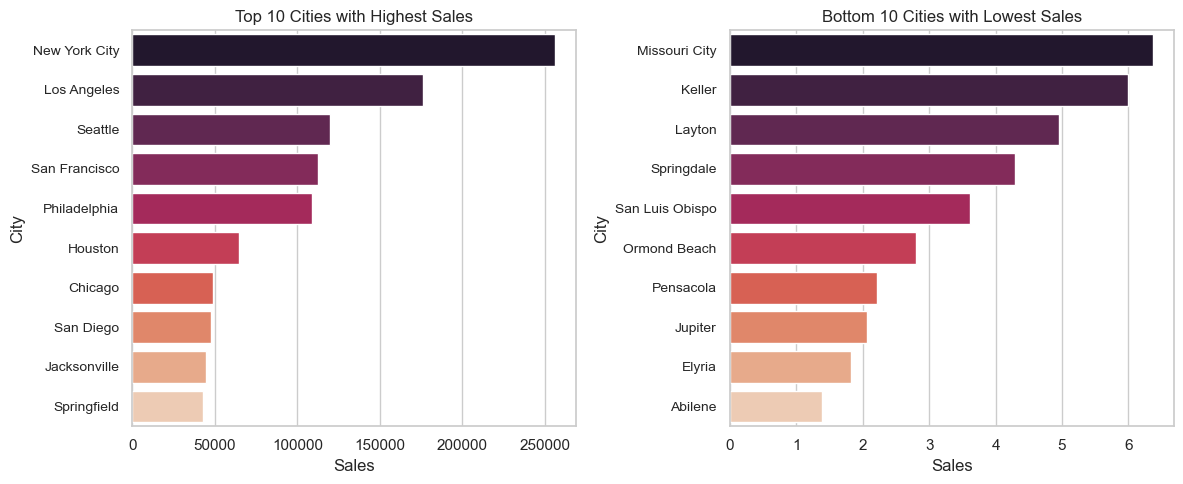

In [53]:
# Set for grouped plots - figure with a 1x2 grid of Axes
figure, axis = plt.subplots(1, 2, figsize=(12, 5))
sns.set_theme(style="whitegrid")
top10c = sns.barplot(data = top10_city, y = top10_city.index, x = top10_city.Sales, palette = "rocket", ax = axis[0])
top10c.set(title = "Top 10 Cities with Highest Sales")
top10c.set_yticklabels(top10c.get_yticklabels(),size = 10)
# Plot Bar Plot for Best Selling Sub-Category
bottom10c = sns.barplot(data = bottom10_city, y = bottom10_city.index, x = bottom10_city.Sales, 
                        palette = "rocket", ax=axis[1])
bottom10c.set(title = "Bottom 10 Cities with Lowest Sales")
bottom10c.set_yticklabels(bottom10c.get_yticklabels(),size = 10)
# Set spacing between subplots
figure.tight_layout()
plt.show()

### Which city generates the most profit
New york still tops the chart as the city generating the most profit. This might be due to thier high population and consuming power. Los angeles follows then seattle. Now philadelphia who was among the top five best selling cities came out as the city with the most loss accrued. 

In [47]:
# group the sales and quantity based on city 
# and picked the top 10 cities with most sales
city_profit = pd.DataFrame(super_store_1.groupby(['City'])[['Profit']].sum().sort_values('Profit',
                                                                                        ascending = False))
top10_profit_city = city_profit[:10]
bottom_profit_city = city_profit[-10:]
#top10_profit_city

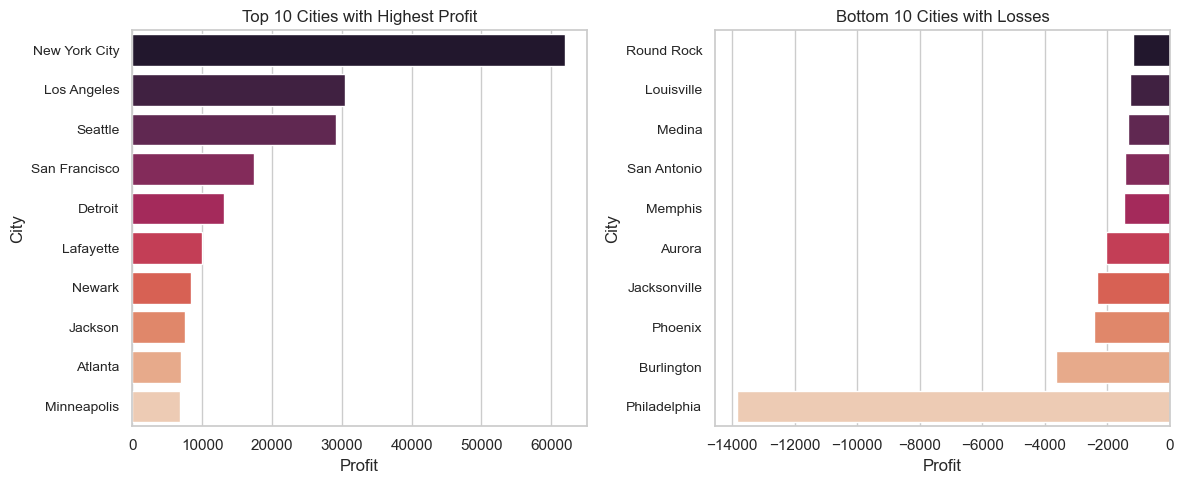

In [52]:
# Set for grouped plots - figure with a 1x2 grid of Axes
figure, axis = plt.subplots(1, 2, figsize=(12, 5))
sns.set_theme(style="whitegrid")
top10c_profit = sns.barplot(data = top10_profit_city, y = top10_profit_city.index, x = top10_profit_city.Profit,
                     palette = "rocket", ax = axis[0])
top10c_profit.set(title = "Top 10 Cities with Highest Profit")
top10c_profit.set_yticklabels(top10c_profit.get_yticklabels(),size = 10)
# Plot Bar Plot for Best Selling Sub-Category
bottom10c_profit = sns.barplot(data = bottom_profit_city, y = bottom_profit_city.index, x = bottom_profit_city.Profit, 
                        palette = "rocket", ax=axis[1])
bottom10c_profit.set(title = "Bottom 10 Cities with Losses")
bottom10c_profit.set_yticklabels(bottom10c_profit.get_yticklabels(),size = 10)
# Set spacing between subplots
figure.tight_layout()
plt.show()

### Some Feature Engineering to ask some interesting questions to the dataset and get corresponding outputs!!



In [53]:
#Let's get some insights based on Cities
grouped= super_store_1.groupby("City")
#Aggregated Sales per city
agg_sales=grouped['Sales'].agg(np.sum).sort_values(ascending=False).reset_index()

In [54]:
#Aggregated Profit per city
agg_profit=grouped['Profit'].agg(np.sum).sort_values(ascending=False).reset_index()

#Aggregate Discount per city
agg_dist=grouped['Discount'].agg(np.sum).sort_values(ascending=False).reset_index()

#Average Sales per city
avg_sales=grouped['Sales'].agg(np.mean).sort_values(ascending=False).reset_index()

#Average Profit per city
avg_profit=grouped['Profit'].agg(np.mean).sort_values(ascending=False).reset_index()

#Average Discount per city
avg_dist=grouped['Discount'].agg(np.mean).sort_values(ascending=False).reset_index()

In [55]:
# here we will make some assumptions
#Cities having High Average Discounts
high_dist=avg_dist[avg_dist['Discount'] >=0.6]
#Cities having low Average Discounts
low_dist=avg_dist[avg_dist['Discount']==0]
#Cities having High Average Sales
high_sales=avg_sales[avg_sales['Sales']>500]
#Cities having low Average Sales
low_sales=avg_sales[avg_sales['Sales']<50]
#Cities having High Average Profit
high_profit=avg_profit[avg_profit['Profit']>100]
#Cities having low Average profit
low_profit=avg_profit[avg_profit['Profit']<0]

### Which are the cities where discount is maximum but sales are nominal?

Here we can see 4 Cities where the Company is giving high discounts but Sales very very low. As already Discounts are high, no question of increasing discount further. Hence here our investment is not fruitful.

In [56]:
#Cities with High-Average-Discounts but Low-Average-Sales
merged_high_disc_low_sales= pd.merge(high_dist,low_sales, on=['City'],how='inner')
merged_high_disc_low_sales

,City,Discount,Sales
0,Ormond Beach,0.7,2.808
1,Elyria,0.7,1.824
2,Pensacola,0.7,2.214
3,Tinley Park,0.6,22.288


### What are the cities having high sales as well as high profit?

The stats above are very pleasing. In all these 23 Cities the sales as well as profit is quite good. Hence if we can invest in these cities (in terms of Discount and other aspects), business can increase more. These can be termed as the Hot-Spots.

In [57]:
#Cities with high Average Sales as well as Average Profit
merged_high_avg_sales_high_average_profit = pd.merge(high_sales,high_profit, on=['City'], how='inner')
merged_high_avg_sales_high_average_profit

,City,Sales,Profit
0,Jamestown,2354.395000,642.885750
1,Cheyenne,1603.136000,100.196000
2,Bellingham,1263.413333,203.530267
3,Independence,1208.685000,487.831500
4,Burbank,1082.386000,254.844600
5,Beverly,861.063333,218.306467
6,Appleton,835.655000,277.383150
7,Lafayette,807.619355,323.173794
8,Torrance,783.067000,136.287750
9,Lehi,758.363000,225.831300


### Are there any city, where sales is high in spite of 0 discount?

These 13 cities are generating high average sales in spite of '0' discount! Hence if our investments can be increased in these cities, then huge sales as well as huge profits can be driven from these Cities. These can be termed as the Dark-Horses.

In [58]:
#Cities where Average Discount is less but Average Sales is High
merged_less_avg_disc_high_sales= pd.merge(low_dist,high_sales, on='City', how='inner')
merged_less_avg_disc_high_sales

,City,Discount,Sales
0,Appleton,0.0,835.655000
1,Saint Peters,0.0,697.160000
2,Harrisonburg,0.0,626.958571
3,Independence,0.0,1208.685000
4,Jamestown,0.0,2354.395000
5,Lafayette,0.0,807.619355
6,Dubuque,0.0,562.433333
7,Noblesville,0.0,772.795000
8,Norman,0.0,675.665000
9,Morristown,0.0,719.014286


###  Is there any cities where sales is good but generating loss?

In Richardson, Round rock and Burlington cities, good amount of sales are there but the company is going with loss here. Hence focus can be shifted from here or the reasons for the loss is to be investigated.

In [59]:
#Cities with high Average sales but low Average profit
merged_high_avg_sales_with_loss= pd.merge(high_sales,low_profit, on='City', how='inner')
merged_high_avg_sales_with_loss

,City,Sales,Profit
0,Burlington,866.723280,-144.915088
1,Round Rock,693.436114,-169.061614
2,Richardson,644.232000,-12.244650


### Which are the cities with very low discount but high profit?

Here are the 27 cities, where the company is not at all providing any discount, yet these cities are genetating good amount of profit. Hence more and more care is to be taken and investments are to be made in these kinds of Hot-Spots!

In [60]:
#Cities with low Average discount but High Average profit
merged_low_disc_high_profit= pd.merge(low_dist, high_profit, on='City', how='inner')
merged_low_disc_high_profit

,City,Discount,Profit
0,Saint Cloud,0.0,156.538000
1,Virginia Beach,0.0,126.555231
2,Warwick,0.0,212.759120
3,Washington,0.0,105.958930
4,Appleton,0.0,277.383150
5,Roswell,0.0,134.857517
6,Saint Peters,0.0,146.403600
7,Vacaville,0.0,110.052800
8,Greenwood,0.0,117.933050
9,Harrisonburg,0.0,127.074843


## Inferences and Recommendation

1. Large cities, like New York, Los Angeles, Seatle, San Francisco are generating highest amount of Sales as well as Profit.

2. In case of Categories, Technology is always leading in terms of Sales and Profit.

3. Some cities are there, where company is giving huge discounts but very less sales and profit is generating.

4. Also there are cities, where discounts are totaly '0', but they are generating high profits.

5. Maximum corporates as well as consumers prefer the Standard class of ship-mode.

6. There are cities where sales as well as profit is very low, infact company is going with a loss there.

### Recommendations

+ Focus on Technology sub-category and Phones and Chairs as they are highest selling and most profitable. Bundle them with the less profitable products such as Bookcases, Table and Chairs to offset the losses.
+ Selling Bookcases and Tables result in huge losses, so Super Store has to consider to bundle them together with High Selling or Profitable sub-category such as Chairs, Copiers, Phones and Office Supplies products.
+ For Home Offices customers, these people might be busy with work and less likely to spend time selecting individual products, so create a Home Office package with products used for offices such as table, chairs, phone, copiers, storage, label, fasteners, bookcases.
+ For loss-making products like Supplies, Bookcases, Tables, consider to either drop these from the catalogue or change suppliers and bargain for cheaper price.
+ Consumer and Corporate Segment make up more than 70% of customerbase. Target them, especially customers from the East and West region in the Top 10 cities with Highest Sales by introducing special promotions and bundles for mass Consumer and Home Offices and send promotional emails or flyers.

## References

1. Stackoverflow. https://stackoverflow.com/questions/40885318/create-a-new-dataframe-from-selecting-specific-rows-from-existing-dataframe-pyth

2. GeeksforGeeks. https://www.geeksforgeeks.org/python-pandas-dataframe-groupby/

3. https://stackoverflow.com/questions/20763012/creating-a-pandas-dataframe-from-a-numpy-array-how-do-i-specify-the-index-colum
4. Jovian. https://jovian.com/mukherjeesubha24/superstore-data-analysis#C13